In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # normalize the pixel values to be in [0, 1]
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Create model
model = tf.keras.Sequential()
#model.add(tf.keras.Input(shape=(28,28)))
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(28*28*2, activation='relu'))
model.add(tf.keras.layers.Dense(28*28, activation='sigmoid'))
model.add(tf.keras.layers.Reshape((28, 28)))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 50)                39250     
                                                                 
 dense_33 (Dense)            (None, 1568)              79968     
                                                                 
 dense_34 (Dense)            (None, 784)               1230096   
                                                                 
 reshape_7 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 1,349,314
Trainable params: 1,349,314
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
# Fit the model
model.fit(x_train, x_train, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 25s 26ms/step - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 2/10
938/938 [==============================] - 28s 30ms/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 3/10
938/938 [==============================] - 26s 28ms/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 4/10
938/938 [==============================] - 26s 28ms/step - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 5/10
938/938 [==============================] - 25s 26ms/step - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 6/10
938/938 [==============================] - 25s 27ms/step - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 7/10
938/938 [==============================] - 26s 28ms/step - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 8/10
938/938 [==============================] - 26s 28ms/step - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 9/10
938/938 [==============================] - 24s 26ms/step - loss: 0.0068 - mean_squared_error:

In [ ]:
# calculate predictions
predictions = model.predict(x_test)
# print(predictions)

313/313 [==============================] - 1s 4ms/step


In [ ]:
def calculate_psnr(original_images, decompressed_images):
    #mse = np.mean(np.square(original_images - decompressed_images))

    psnr_sum = 0
    for image in range(original_images.shape[0]):
      psnr_sum +=  10 * np.log10(1 / np.mean(np.square(original_images[image,:,:] - decompressed_images[image,:,:])))

    # max_intensity = 1.0  # Assuming normalized grayscale image
    # psnr = 10 * np.log10(max_intensity**2 / mse)
    return psnr_sum/original_images.shape[0]

In [ ]:
print(calculate_psnr(x_test, predictions))

22.69682999985327


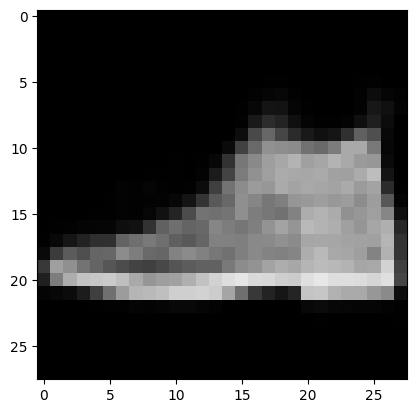

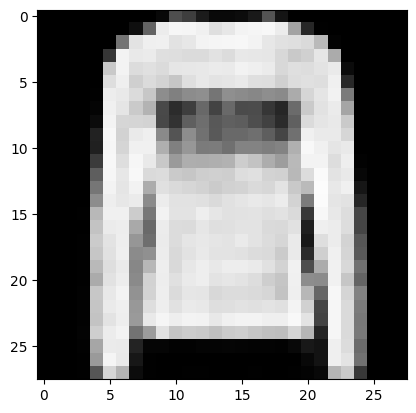

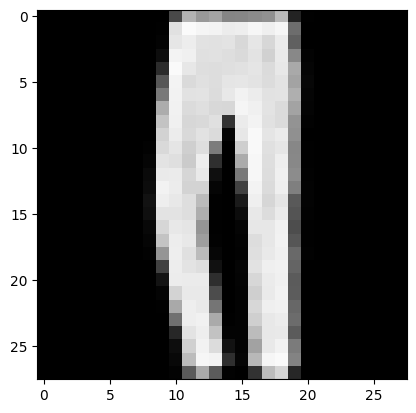

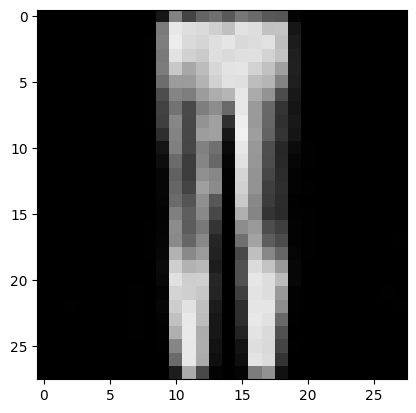

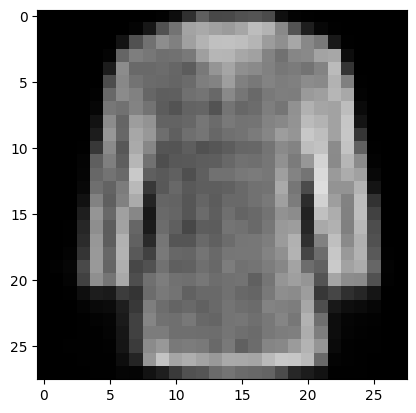

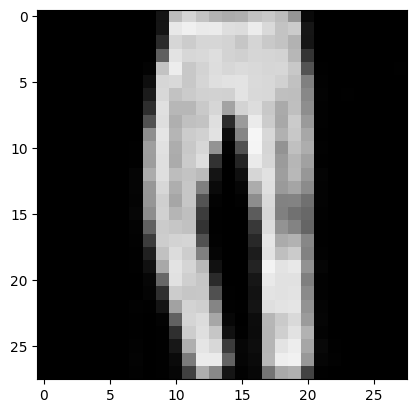

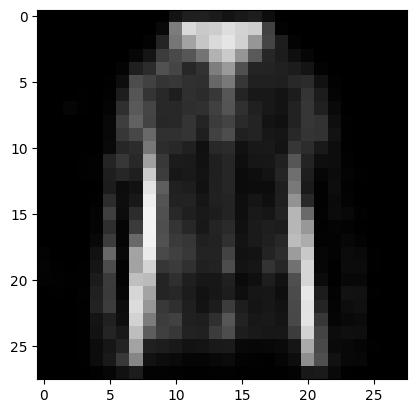

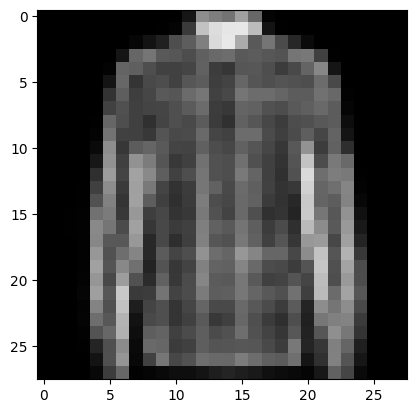

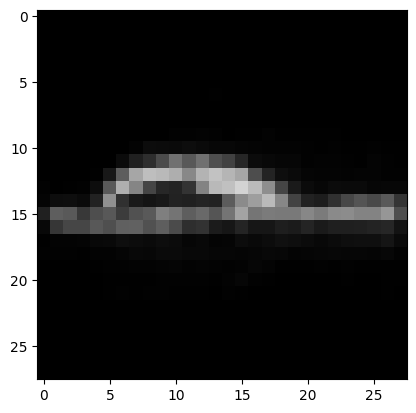

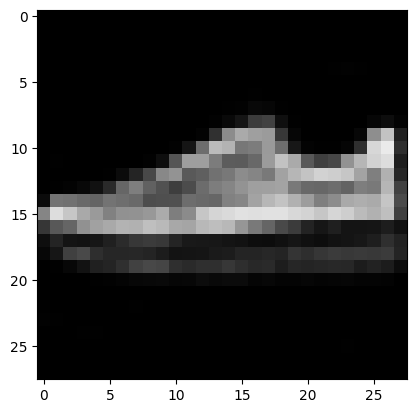

In [ ]:
import matplotlib.pyplot as plt
for i in range(10):
  plt.imshow(predictions[i, :, :], cmap='gray', vmin=0, vmax=1)
  plt.show()